# DAT210x - Programming with Python for DS

## Module6- Lab1

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import time

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

from IPython.core.interactiveshell import InteractiveShell #shows all output
InteractiveShell.ast_node_interactivity = "all"

Feel free to adjust and experiment with these parameters after you have completed the lab:

In [16]:
C = 1
kernel = 'linear'

In [17]:
# TODO: Change to 200000 once you get to Question#2
iterations = 5000

# You can set this to false if you want to draw the full square matrix:
FAST_DRAW = True

### Convenience Functions

In [18]:
def drawPlots(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    # You can use this to break any higher-dimensional space down,
    # And view cross sections of it.

    # If this line throws an error, use plt.style.use('ggplot') instead
    mpl.style.use('ggplot') # Look Pretty

    padding = 3
    resolution = 0.5
    max_2d_score = 0

    y_colors = ['#ff0000', '#00ff00', '#0000ff']
    my_cmap  = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
    colors   = [y_colors[i] for i in y_train]
    num_columns = len(X_train.columns)

    fig = plt.figure()
    fig.canvas.set_window_title(wintitle)
    fig.set_tight_layout(True)
    
    cnt = 0
    for col in range(num_columns):
        for row in range(num_columns):
            
            # Easy out
            if FAST_DRAW and col > row:
                cnt += 1
                continue

            ax = plt.subplot(num_columns, num_columns, cnt + 1)
            plt.xticks(())
            plt.yticks(())

            # Intersection:
            if col == row:
                plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
                cnt += 1
                continue


            # Only select two features to display, then train the model
            X_train_bag = X_train.ix[:, [row,col]]
            X_test_bag = X_test.ix[:, [row,col]]
            model.fit(X_train_bag, y_train)

            # Create a mesh to plot in
            x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
            y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                                 np.arange(y_min, y_max, resolution))

            # Plot Boundaries
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())

            # Prepare the contour
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
            plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)


            score = round(model.score(X_test_bag, y_test) * 100, 3)
            plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
            max_2d_score = score if score > max_2d_score else max_2d_score

            cnt += 1

    print("Max 2D Score: ", max_2d_score)

In [19]:
def benchmark(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    print(wintitle + ' Results')
    s = time.time()
    
    for i in range(iterations):
        # TODO: train the classifier on the training data / labels:
        model.fit(X_train,y_train)
        # .. your code here ..
        print("{0} Iterations Training Time: ".format(iterations), time.time() - s)


    s = time.time()
    for i in range(iterations):
        # TODO: score the classifier on the testing data / labels:
        score = model.score(X_test,y_test)
        # .. your code here ..
        print("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
        print("High-Dimensionality Score: ", round((score*100), 3))

### The Assignment

Load up the wheat dataset into dataframe `X` and verify you did it properly. Indices shouldn't be doubled, nor should you have any headers with weird characters...

In [20]:
X = pd.read_csv('C:\\Users\\ashish.r\\Documents\\GitHub\\DAT210x\\Module6\\Datasets\\wheat.data',index_col=0)
X.shape
X = X.dropna(axis=0)
X.shape
pd.isnull(X).sum()

(210, 8)

(203, 8)

area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
groove         0
wheat_type     0
dtype: int64

In [21]:
# An easy way to show which rows have nans in them:
X[pd.isnull(X).any(axis=1)]

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,


Go ahead and drop any row with a nan:

In [22]:
# .. your code here ..

In the future, you might try setting the nan values to the mean value of that column, the mean should only be calculated for the specific class rather than across all classes, now that you have the labels.

Copy the labels out of the dataframe into variable `y`, then remove them from `X`.

Encode the labels, using the `.map()` trick we showed you in Module 5, such that `canadian:0`, `kama:1`, and `rosa:2`.

In [23]:
y = X.wheat_type

X = X.drop(labels='wheat_type',axis=1)

y = y.map({'canadian': 0, 'kama': 1, 'rosa': 2})

y.dtypes

dtype('int64')

Split your data into a `test` and `train` set. Your `test` size should be 30% with `random_state` 7. Please use variable names: `X_train`, `X_test`, `y_train`, and `y_test`:

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

Create an SVC classifier named `svc` and use a linear kernel. You already have `C` defined at the top of the lab, so just set `C=C`.

In [25]:
svc = SVC(kernel='linear',C = C)

Create an KNeighbors classifier named `knn` and set the neighbor count to `5`:

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)

In [46]:
tr = tree.DecisionTreeClassifier(max_depth=1,random_state=2)

### Fire it Up:

In [47]:
benchmark(tr, X_train, X_test, y_train, y_test, 'Decision Tree')
drawPlots(tr, X_train, X_test, y_train, y_test, 'Decision Tree')

Decision Tree Results
5000 Iterations Training Time:  0.0010006427764892578
5000 Iterations Training Time:  0.002002239227294922
5000 Iterations Training Time:  0.0030083656311035156
5000 Iterations Training Time:  0.005002021789550781
5000 Iterations Training Time:  0.0060002803802490234
5000 Iterations Training Time:  0.007999897003173828
5000 Iterations Training Time:  0.01000213623046875
5000 Iterations Training Time:  0.011000394821166992
5000 Iterations Training Time:  0.011998891830444336
5000 Iterations Training Time:  0.013001441955566406
5000 Iterations Training Time:  0.013999462127685547
5000 Iterations Training Time:  0.015999794006347656
5000 Iterations Training Time:  0.01699995994567871
5000 Iterations Training Time:  0.018001317977905273
5000 Iterations Training Time:  0.019002914428710938
5000 Iterations Training Time:  0.019999980926513672
5000 Iterations Training Time:  0.02099919319152832
5000 Iterations Training Time:  0.022004127502441406
5000 Iterations Training

5000 Iterations Training Time:  0.31810545921325684
5000 Iterations Training Time:  0.319105863571167
5000 Iterations Training Time:  0.3201026916503906
5000 Iterations Training Time:  0.3211026191711426
5000 Iterations Training Time:  0.32210397720336914
5000 Iterations Training Time:  0.323101282119751
5000 Iterations Training Time:  0.32410168647766113
5000 Iterations Training Time:  0.3251025676727295
5000 Iterations Training Time:  0.32610273361206055
5000 Iterations Training Time:  0.3271021842956543
5000 Iterations Training Time:  0.32811665534973145
5000 Iterations Training Time:  0.3291010856628418
5000 Iterations Training Time:  0.33010125160217285
5000 Iterations Training Time:  0.33110475540161133
5000 Iterations Training Time:  0.33210182189941406
5000 Iterations Training Time:  0.33312106132507324
5000 Iterations Training Time:  0.33312106132507324
5000 Iterations Training Time:  0.33410143852233887
5000 Iterations Training Time:  0.3351001739501953
5000 Iterations Traini

5000 Iterations Training Time:  0.7118301391601562
5000 Iterations Training Time:  0.7118301391601562
5000 Iterations Training Time:  0.7128291130065918
5000 Iterations Training Time:  0.7138354778289795
5000 Iterations Training Time:  0.7148308753967285
5000 Iterations Training Time:  0.7148308753967285
5000 Iterations Training Time:  0.7158288955688477
5000 Iterations Training Time:  0.7168266773223877
5000 Iterations Training Time:  0.7178394794464111
5000 Iterations Training Time:  0.7188262939453125
5000 Iterations Training Time:  0.7188262939453125
5000 Iterations Training Time:  0.7198264598846436
5000 Iterations Training Time:  0.7208387851715088
5000 Iterations Training Time:  0.7208387851715088
5000 Iterations Training Time:  0.7218294143676758
5000 Iterations Training Time:  0.7228262424468994
5000 Iterations Training Time:  0.7238256931304932
5000 Iterations Training Time:  0.7248263359069824
5000 Iterations Training Time:  0.7258274555206299
5000 Iterations Training Time: 

5000 Iterations Training Time:  1.1294429302215576
5000 Iterations Training Time:  1.1304407119750977
5000 Iterations Training Time:  1.1304407119750977
5000 Iterations Training Time:  1.1314401626586914
5000 Iterations Training Time:  1.1324403285980225
5000 Iterations Training Time:  1.1334443092346191
5000 Iterations Training Time:  1.1344425678253174
5000 Iterations Training Time:  1.1354413032531738
5000 Iterations Training Time:  1.1364400386810303
5000 Iterations Training Time:  1.1374402046203613
5000 Iterations Training Time:  1.1384403705596924
5000 Iterations Training Time:  1.1394398212432861
5000 Iterations Training Time:  1.1404399871826172
5000 Iterations Training Time:  1.1414384841918945
5000 Iterations Training Time:  1.1434433460235596
5000 Iterations Training Time:  1.1444408893585205
5000 Iterations Training Time:  1.1454412937164307
5000 Iterations Training Time:  1.1474385261535645
5000 Iterations Training Time:  1.1484386920928955
5000 Iterations Training Time: 

5000 Iterations Training Time:  1.582726240158081
5000 Iterations Training Time:  1.5837388038635254
5000 Iterations Training Time:  1.584723949432373
5000 Iterations Training Time:  1.585731029510498
5000 Iterations Training Time:  1.5867316722869873
5000 Iterations Training Time:  1.5877273082733154
5000 Iterations Training Time:  1.5887305736541748
5000 Iterations Training Time:  1.5887305736541748
5000 Iterations Training Time:  1.589724063873291
5000 Iterations Training Time:  1.590723991394043
5000 Iterations Training Time:  1.590723991394043
5000 Iterations Training Time:  1.5927424430847168
5000 Iterations Training Time:  1.5937228202819824
5000 Iterations Training Time:  1.5947282314300537
5000 Iterations Training Time:  1.5957348346710205
5000 Iterations Training Time:  1.5967233180999756
5000 Iterations Training Time:  1.5977239608764648
5000 Iterations Training Time:  1.5977239608764648
5000 Iterations Training Time:  1.598738431930542
5000 Iterations Training Time:  1.5997

5000 Iterations Training Time:  1.9989383220672607
5000 Iterations Training Time:  1.999936580657959
5000 Iterations Training Time:  2.00093936920166
5000 Iterations Training Time:  2.00193452835083
5000 Iterations Training Time:  2.0029358863830566
5000 Iterations Training Time:  2.003934383392334
5000 Iterations Training Time:  2.0049374103546143
5000 Iterations Training Time:  2.0049374103546143
5000 Iterations Training Time:  2.0059380531311035
5000 Iterations Training Time:  2.0069382190704346
5000 Iterations Training Time:  2.007941246032715
5000 Iterations Training Time:  2.007941246032715
5000 Iterations Training Time:  2.0089361667633057
5000 Iterations Training Time:  2.0089361667633057
5000 Iterations Training Time:  2.0099353790283203
5000 Iterations Training Time:  2.0109403133392334
5000 Iterations Training Time:  2.0119404792785645
5000 Iterations Training Time:  2.0119404792785645
5000 Iterations Training Time:  2.012935161590576
5000 Iterations Training Time:  2.013934

5000 Iterations Training Time:  2.4370474815368652
5000 Iterations Training Time:  2.438044786453247
5000 Iterations Training Time:  2.4390463829040527
5000 Iterations Training Time:  2.440049171447754
5000 Iterations Training Time:  2.4420456886291504
5000 Iterations Training Time:  2.444046974182129
5000 Iterations Training Time:  2.4450488090515137
5000 Iterations Training Time:  2.4460442066192627
5000 Iterations Training Time:  2.447044849395752
5000 Iterations Training Time:  2.4480512142181396
5000 Iterations Training Time:  2.449045419692993
5000 Iterations Training Time:  2.450044631958008
5000 Iterations Training Time:  2.4510509967803955
5000 Iterations Training Time:  2.4510509967803955
5000 Iterations Training Time:  2.4520444869995117
5000 Iterations Training Time:  2.4530444145202637
5000 Iterations Training Time:  2.4540445804595947
5000 Iterations Training Time:  2.455045700073242
5000 Iterations Training Time:  2.4560441970825195
5000 Iterations Training Time:  2.4565

5000 Iterations Training Time:  2.8926117420196533
5000 Iterations Training Time:  2.8926117420196533
5000 Iterations Training Time:  2.8936119079589844
5000 Iterations Training Time:  2.8946115970611572
5000 Iterations Training Time:  2.8956117630004883
5000 Iterations Training Time:  2.8956117630004883
5000 Iterations Training Time:  2.8966121673583984
5000 Iterations Training Time:  2.8976128101348877
5000 Iterations Training Time:  2.898611307144165
5000 Iterations Training Time:  2.899610996246338
5000 Iterations Training Time:  2.899610996246338
5000 Iterations Training Time:  2.9006104469299316
5000 Iterations Training Time:  2.90161395072937
5000 Iterations Training Time:  2.902620553970337
5000 Iterations Training Time:  2.903611660003662
5000 Iterations Training Time:  2.903611660003662
5000 Iterations Training Time:  2.904611825942993
5000 Iterations Training Time:  2.9056246280670166
5000 Iterations Training Time:  2.9066123962402344
5000 Iterations Training Time:  2.907612

5000 Iterations Training Time:  3.396751880645752
5000 Iterations Training Time:  3.3977608680725098
5000 Iterations Training Time:  3.3987317085266113
5000 Iterations Training Time:  3.399730682373047
5000 Iterations Training Time:  3.399730682373047
5000 Iterations Training Time:  3.4007303714752197
5000 Iterations Training Time:  3.401731014251709
5000 Iterations Training Time:  3.4027304649353027
5000 Iterations Training Time:  3.4037318229675293
5000 Iterations Training Time:  3.404733657836914
5000 Iterations Training Time:  3.404733657836914
5000 Iterations Training Time:  3.405733108520508
5000 Iterations Training Time:  3.4067323207855225
5000 Iterations Training Time:  3.40775203704834
5000 Iterations Training Time:  3.4087302684783936
5000 Iterations Training Time:  3.4097342491149902
5000 Iterations Training Time:  3.4107298851013184
5000 Iterations Training Time:  3.411731243133545
5000 Iterations Training Time:  3.4127416610717773
5000 Iterations Training Time:  3.4137296

5000 Iterations Training Time:  3.993868827819824
5000 Iterations Training Time:  3.994856595993042
5000 Iterations Training Time:  3.9958534240722656
5000 Iterations Training Time:  3.996852397918701
5000 Iterations Training Time:  3.997852325439453
5000 Iterations Training Time:  3.9988656044006348
5000 Iterations Training Time:  3.999851942062378
5000 Iterations Training Time:  4.0008556842803955
5000 Iterations Training Time:  4.0008556842803955
5000 Iterations Training Time:  4.002861022949219
5000 Iterations Training Time:  4.002861022949219
5000 Iterations Training Time:  4.004859209060669
5000 Iterations Training Time:  4.004859209060669
5000 Iterations Training Time:  4.005853176116943
5000 Iterations Training Time:  4.006856918334961
5000 Iterations Training Time:  4.007858037948608
5000 Iterations Training Time:  4.008855819702148
5000 Iterations Training Time:  4.0098559856414795
5000 Iterations Training Time:  4.010854244232178
5000 Iterations Training Time:  4.01185750961

5000 Iterations Training Time:  4.5650553703308105
5000 Iterations Training Time:  4.566055059432983
5000 Iterations Training Time:  4.567058324813843
5000 Iterations Training Time:  4.568055629730225
5000 Iterations Training Time:  4.56905722618103
5000 Iterations Training Time:  4.570054292678833
5000 Iterations Training Time:  4.571056365966797
5000 Iterations Training Time:  4.572054386138916
5000 Iterations Training Time:  4.572554349899292
5000 Iterations Training Time:  4.573557138442993
5000 Iterations Training Time:  4.574570417404175
5000 Iterations Training Time:  4.575570344924927
5000 Iterations Training Time:  4.57657265663147
5000 Iterations Training Time:  4.577568769454956
5000 Iterations Training Time:  4.578570127487183
5000 Iterations Training Time:  4.579567909240723
5000 Iterations Training Time:  4.580568552017212
5000 Iterations Training Time:  4.581568241119385
5000 Iterations Training Time:  4.581568241119385
5000 Iterations Training Time:  4.582568407058716
5

5000 Iterations Training Time:  5.142247200012207
5000 Iterations Training Time:  5.144244909286499
5000 Iterations Training Time:  5.145250558853149
5000 Iterations Training Time:  5.147245645523071
5000 Iterations Training Time:  5.148244142532349
5000 Iterations Training Time:  5.149245977401733
5000 Iterations Training Time:  5.1512439250946045
5000 Iterations Training Time:  5.152244806289673
5000 Iterations Training Time:  5.153244972229004
5000 Iterations Training Time:  5.154245138168335
5000 Iterations Training Time:  5.156244993209839
5000 Iterations Training Time:  5.157246828079224
5000 Iterations Training Time:  5.158761262893677
5000 Iterations Training Time:  5.160270690917969
5000 Iterations Training Time:  5.16176176071167
5000 Iterations Training Time:  5.162770748138428
5000 Iterations Training Time:  5.164261341094971
5000 Iterations Training Time:  5.165273666381836
5000 Iterations Training Time:  5.166760444641113
5000 Iterations Training Time:  5.167776584625244


5000 Iterations Scoring Time:  0.35976171493530273
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.3617665767669678
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.36276674270629883
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.3637657165527344
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.36476659774780273
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.47329187393188477
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.4743006229400635
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.4752926826477051
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.4772934913635254
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.47829222679138184
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.4792921543121338
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.4812932014465332
High-Dimen

5000 Iterations Scoring Time:  0.9104132652282715
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.9114065170288086
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.9114065170288086
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.9124059677124023
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.9134068489074707
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.9144096374511719
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.9144096374511719
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.9154050350189209
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.9164025783538818
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.9174060821533203
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.9194064140319824
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  0.9194064140319824
High-Dimensiona

5000 Iterations Scoring Time:  1.3355090618133545
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.3365089893341064
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.337507963180542
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.338508129119873
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.3395090103149414
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.3405122756958008
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.341510534286499
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.3420240879058838
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.3435232639312744
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.3440260887145996
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.3450210094451904
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.345522165298462
High-Dimensionality

High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.80167555809021
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.80267333984375
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.80267333984375
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.803673505783081
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.8046751022338867
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.805673599243164
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.8076741695404053
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.808675765991211
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.809675693511963
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.8106942176818848
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.8116731643676758
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  1.8126749

High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.2808141708374023
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.281813621520996
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.282813787460327
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.2848119735717773
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.285814046859741
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.287813425064087
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.2888126373291016
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.2928385734558105
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.2958390712738037
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.2978131771087646
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.2988133430480957
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.2

5000 Iterations Scoring Time:  2.939953088760376
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.9409546852111816
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.941964864730835
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.942962169647217
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.9439537525177
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.944955348968506
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.945956230163574
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.945956230163574
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.9469542503356934
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.9479639530181885
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.9489564895629883
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  2.949954032897949
High-Dimensionality Score

High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  3.8611011505126953
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  3.862112522125244
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  3.863102674484253
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  3.8641016483306885
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  3.865105152130127
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  3.866107225418091
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  3.86810302734375
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  3.8691017627716064
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  3.8701021671295166
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  3.8711025714874268
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  3.873103141784668
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  3.8741

High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  4.572787761688232
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  4.573770046234131
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  4.574274301528931
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  4.574769973754883
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  4.575270414352417
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  4.576271295547485
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  4.577270984649658
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  4.577771186828613
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  4.578273057937622
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  4.579271078109741
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  4.579772710800171
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  4.58027076

High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.0014283657073975
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.002426624298096
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.003431081771851
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.005439281463623
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.006430625915527
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.006430625915527
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.007425308227539
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.00842547416687
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.00842547416687
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.009427785873413
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.010426044464111
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.010426044

High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.393524408340454
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.394522428512573
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.394522428512573
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.395522832870483
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.39652419090271
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.39652419090271
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.397524833679199
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.398523569107056
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.3995277881622314
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.3995277881622314
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.4005279541015625
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  5.4015233

High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.169143915176392
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.1701340675354
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.1711342334747314
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.1721343994140625
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.173137426376343
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.17364764213562
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.174650430679321
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.1751508712768555
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.175650358200073
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.176647186279297
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.177148103713989
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.17765998

5000 Iterations Scoring Time:  6.552472829818726
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.552472829818726
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.553462266921997
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.553462266921997
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.555465221405029
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.555465221405029
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.556460618972778
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.5584635734558105
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.5584635734558105
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.559473514556885
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.560474157333374
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  6.560474157333374
High-Dimensionality Score

High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.0438408851623535
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.04483962059021
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.0458457469940186
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.0458457469940186
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.046837568283081
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.046837568283081
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.047837734222412
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.048836708068848
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.048836708068848
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.0498363971710205
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.0498363971710205
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.0508

5000 Iterations Scoring Time:  7.480872631072998
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.481871128082275
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.4823691844940186
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.483367919921875
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.4838690757751465
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.484868049621582
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.485867977142334
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.486377716064453
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.487369775772095
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.4883692264556885
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.488871097564697
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.489372253417969
High-Dimensionality Scor

5000 Iterations Scoring Time:  7.924070835113525
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.925060272216797
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.926061630249023
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.926061630249023
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.927061557769775
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.9280619621276855
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.92907190322876
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.93006157875061
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.93006157875061
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.931061506271362
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.932079792022705
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  7.932079792022705
High-Dimensionality Score:  6

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:47: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  8.354384183883667
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  8.354384183883667
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  8.355398893356323
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  8.355398893356323
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  8.356381893157959
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  8.357382535934448
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  8.357382535934448
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  8.358381509780884
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  8.358381509780884
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  8.359380006790161
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  8.359380006790161
High-Dimensionality Score:  68.852
5000 Iterations Scoring Time:  8.36038184

In [28]:
benchmark(knn, X_train, X_test, y_train, y_test, 'KNeighbors')
drawPlots(knn, X_train, X_test, y_train, y_test, 'KNeighbors')

KNeighbors Results
5000 Iterations Training Time:  0.0010161399841308594
5000 Iterations Training Time:  0.002518177032470703
5000 Iterations Training Time:  0.003515005111694336
5000 Iterations Training Time:  0.005016803741455078
5000 Iterations Training Time:  0.0060160160064697266
5000 Iterations Training Time:  0.009016275405883789
5000 Iterations Training Time:  0.011513471603393555
5000 Iterations Training Time:  0.013017416000366211
5000 Iterations Training Time:  0.015011787414550781
5000 Iterations Training Time:  0.01702570915222168
5000 Iterations Training Time:  0.018025636672973633
5000 Iterations Training Time:  0.020027875900268555
5000 Iterations Training Time:  0.022024154663085938
5000 Iterations Training Time:  0.023028135299682617
5000 Iterations Training Time:  0.02503347396850586
5000 Iterations Training Time:  0.02702617645263672
5000 Iterations Training Time:  0.029027223587036133
5000 Iterations Training Time:  0.030025482177734375
5000 Iterations Training Tim

5000 Iterations Training Time:  0.37805700302124023
5000 Iterations Training Time:  0.38005733489990234
5000 Iterations Training Time:  0.3810608386993408
5000 Iterations Training Time:  0.3830556869506836
5000 Iterations Training Time:  0.38405680656433105
5000 Iterations Training Time:  0.38605761528015137
5000 Iterations Training Time:  0.3890573978424072
5000 Iterations Training Time:  0.3900575637817383
5000 Iterations Training Time:  0.39106273651123047
5000 Iterations Training Time:  0.39305686950683594
5000 Iterations Training Time:  0.39505648612976074
5000 Iterations Training Time:  0.39705753326416016
5000 Iterations Training Time:  0.3980576992034912
5000 Iterations Training Time:  0.4000575542449951
5000 Iterations Training Time:  0.40105748176574707
5000 Iterations Training Time:  0.4030585289001465
5000 Iterations Training Time:  0.4050629138946533
5000 Iterations Training Time:  0.4070627689361572
5000 Iterations Training Time:  0.4090607166290283
5000 Iterations Traini

5000 Iterations Training Time:  0.8986930847167969
5000 Iterations Training Time:  0.900688886642456
5000 Iterations Training Time:  0.9021878242492676
5000 Iterations Training Time:  0.9041907787322998
5000 Iterations Training Time:  0.9056878089904785
5000 Iterations Training Time:  0.907198429107666
5000 Iterations Training Time:  0.9092042446136475
5000 Iterations Training Time:  0.9112005233764648
5000 Iterations Training Time:  0.913198709487915
5000 Iterations Training Time:  0.914198637008667
5000 Iterations Training Time:  0.9161989688873291
5000 Iterations Training Time:  0.9181997776031494
5000 Iterations Training Time:  0.9191982746124268
5000 Iterations Training Time:  0.9212014675140381
5000 Iterations Training Time:  0.9221987724304199
5000 Iterations Training Time:  0.9241986274719238
5000 Iterations Training Time:  0.926196813583374
5000 Iterations Training Time:  0.9271969795227051
5000 Iterations Training Time:  0.9291973114013672
5000 Iterations Training Time:  0.93

5000 Iterations Training Time:  1.48423433303833
5000 Iterations Training Time:  1.4852337837219238
5000 Iterations Training Time:  1.4862337112426758
5000 Iterations Training Time:  1.4872331619262695
5000 Iterations Training Time:  1.4872331619262695
5000 Iterations Training Time:  1.4882333278656006
5000 Iterations Training Time:  1.4892356395721436
5000 Iterations Training Time:  1.4902336597442627
5000 Iterations Training Time:  1.4912457466125488
5000 Iterations Training Time:  1.4917473793029785
5000 Iterations Training Time:  1.4927444458007812
5000 Iterations Training Time:  1.4932453632354736
5000 Iterations Training Time:  1.4942448139190674
5000 Iterations Training Time:  1.494750738143921
5000 Iterations Training Time:  1.4957432746887207
5000 Iterations Training Time:  1.4962430000305176
5000 Iterations Training Time:  1.4972457885742188
5000 Iterations Training Time:  1.4982564449310303
5000 Iterations Training Time:  1.4992430210113525
5000 Iterations Training Time:  1.

5000 Iterations Training Time:  2.0213866233825684
5000 Iterations Training Time:  2.02238392829895
5000 Iterations Training Time:  2.023383378982544
5000 Iterations Training Time:  2.0243828296661377
5000 Iterations Training Time:  2.0243828296661377
5000 Iterations Training Time:  2.0253796577453613
5000 Iterations Training Time:  2.026381731033325
5000 Iterations Training Time:  2.0273821353912354
5000 Iterations Training Time:  2.0283830165863037
5000 Iterations Training Time:  2.0293822288513184
5000 Iterations Training Time:  2.0313806533813477
5000 Iterations Training Time:  2.0323808193206787
5000 Iterations Training Time:  2.0323808193206787
5000 Iterations Training Time:  2.0333824157714844
5000 Iterations Training Time:  2.034383535385132
5000 Iterations Training Time:  2.035383462905884
5000 Iterations Training Time:  2.036384344100952
5000 Iterations Training Time:  2.0373871326446533
5000 Iterations Training Time:  2.0383989810943604
5000 Iterations Training Time:  2.0393

5000 Iterations Training Time:  2.547315835952759
5000 Iterations Training Time:  2.548316478729248
5000 Iterations Training Time:  2.549315929412842
5000 Iterations Training Time:  2.5503156185150146
5000 Iterations Training Time:  2.5503156185150146
5000 Iterations Training Time:  2.551314353942871
5000 Iterations Training Time:  2.552311658859253
5000 Iterations Training Time:  2.553311347961426
5000 Iterations Training Time:  2.553311347961426
5000 Iterations Training Time:  2.5543112754821777
5000 Iterations Training Time:  2.555311441421509
5000 Iterations Training Time:  2.5563111305236816
5000 Iterations Training Time:  2.5563111305236816
5000 Iterations Training Time:  2.557316780090332
5000 Iterations Training Time:  2.558311700820923
5000 Iterations Training Time:  2.559311628341675
5000 Iterations Training Time:  2.560311794281006
5000 Iterations Training Time:  2.5613107681274414
5000 Iterations Training Time:  2.5613107681274414
5000 Iterations Training Time:  2.562311410

5000 Iterations Training Time:  3.096673011779785
5000 Iterations Training Time:  3.0976717472076416
5000 Iterations Training Time:  3.0986716747283936
5000 Iterations Training Time:  3.0996742248535156
5000 Iterations Training Time:  3.1001789569854736
5000 Iterations Training Time:  3.101177453994751
5000 Iterations Training Time:  3.1021735668182373
5000 Iterations Training Time:  3.102679967880249
5000 Iterations Training Time:  3.10367488861084
5000 Iterations Training Time:  3.104172706604004
5000 Iterations Training Time:  3.105172872543335
5000 Iterations Training Time:  3.1056759357452393
5000 Iterations Training Time:  3.106672763824463
5000 Iterations Training Time:  3.106672763824463
5000 Iterations Training Time:  3.1078765392303467
5000 Iterations Training Time:  3.1097638607025146
5000 Iterations Training Time:  3.1107680797576904
5000 Iterations Training Time:  3.1117618083953857
5000 Iterations Training Time:  3.1127607822418213
5000 Iterations Training Time:  3.113755

5000 Iterations Training Time:  3.578359603881836
5000 Iterations Training Time:  3.578359603881836
5000 Iterations Training Time:  3.5793588161468506
5000 Iterations Training Time:  3.5803608894348145
5000 Iterations Training Time:  3.581359624862671
5000 Iterations Training Time:  3.5823593139648438
5000 Iterations Training Time:  3.5823593139648438
5000 Iterations Training Time:  3.5833587646484375
5000 Iterations Training Time:  3.584359645843506
5000 Iterations Training Time:  3.5853590965270996
5000 Iterations Training Time:  3.5853590965270996
5000 Iterations Training Time:  3.5863585472106934
5000 Iterations Training Time:  3.5873594284057617
5000 Iterations Training Time:  3.588357448577881
5000 Iterations Training Time:  3.5893607139587402
5000 Iterations Training Time:  3.5903587341308594
5000 Iterations Training Time:  3.5903587341308594
5000 Iterations Training Time:  3.5918686389923096
5000 Iterations Training Time:  3.5928688049316406
5000 Iterations Training Time:  3.59

5000 Iterations Training Time:  4.144531965255737
5000 Iterations Training Time:  4.145532846450806
5000 Iterations Training Time:  4.145532846450806
5000 Iterations Training Time:  4.148531913757324
5000 Iterations Training Time:  4.149534225463867
5000 Iterations Training Time:  4.150533199310303
5000 Iterations Training Time:  4.151533842086792
5000 Iterations Training Time:  4.15253210067749
5000 Iterations Training Time:  4.153534650802612
5000 Iterations Training Time:  4.154535531997681
5000 Iterations Training Time:  4.155531883239746
5000 Iterations Training Time:  4.157532215118408
5000 Iterations Training Time:  4.15853214263916
5000 Iterations Training Time:  4.15853214263916
5000 Iterations Training Time:  4.159534931182861
5000 Iterations Training Time:  4.160532236099243
5000 Iterations Training Time:  4.161532878875732
5000 Iterations Training Time:  4.162532567977905
5000 Iterations Training Time:  4.163533687591553
5000 Iterations Training Time:  4.164532899856567
500

5000 Iterations Training Time:  4.668882369995117
5000 Iterations Training Time:  4.669881105422974
5000 Iterations Training Time:  4.669881105422974
5000 Iterations Training Time:  4.670880556106567
5000 Iterations Training Time:  4.6718833446502686
5000 Iterations Training Time:  4.6728835105896
5000 Iterations Training Time:  4.673884391784668
5000 Iterations Training Time:  4.674881935119629
5000 Iterations Training Time:  4.674881935119629
5000 Iterations Training Time:  4.675881385803223
5000 Iterations Training Time:  4.6768975257873535
5000 Iterations Training Time:  4.6768975257873535
5000 Iterations Training Time:  4.67788028717041
5000 Iterations Training Time:  4.67888331413269
5000 Iterations Training Time:  4.6798834800720215
5000 Iterations Training Time:  4.6798834800720215
5000 Iterations Training Time:  4.68089747428894
5000 Iterations Training Time:  4.681884288787842
5000 Iterations Training Time:  4.681884288787842
5000 Iterations Training Time:  4.682883977890015


5000 Iterations Training Time:  5.133218288421631
5000 Iterations Training Time:  5.133218288421631
5000 Iterations Training Time:  5.134212255477905
5000 Iterations Training Time:  5.1352150440216064
5000 Iterations Training Time:  5.136214017868042
5000 Iterations Training Time:  5.137212753295898
5000 Iterations Training Time:  5.1382129192352295
5000 Iterations Training Time:  5.139215707778931
5000 Iterations Training Time:  5.139215707778931
5000 Iterations Training Time:  5.140213489532471
5000 Iterations Training Time:  5.1412129402160645
5000 Iterations Training Time:  5.1422131061553955
5000 Iterations Training Time:  5.143213272094727
5000 Iterations Training Time:  5.143213272094727
5000 Iterations Training Time:  5.14421534538269
5000 Iterations Training Time:  5.14522647857666
5000 Iterations Training Time:  5.147216081619263
5000 Iterations Training Time:  5.148216247558594
5000 Iterations Training Time:  5.148216247558594
5000 Iterations Training Time:  5.14921641349792

5000 Iterations Scoring Time:  0.05205202102661133
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.05304765701293945
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.05504322052001953
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.05604696273803711
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.057045698165893555
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.05904412269592285
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.060045719146728516
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.06204533576965332
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.06305837631225586
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.06504511833190918
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.0670466423034668
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.06806230545043945
Hi

5000 Iterations Scoring Time:  0.5121273994445801
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.5131292343139648
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.5151395797729492
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.5161302089691162
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.5171306133270264
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.5191299915313721
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.5206687450408936
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.5221695899963379
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.5236718654632568
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.525184154510498
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.5266857147216797
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  0.5281820297241211
High-Dimensional

5000 Iterations Scoring Time:  1.0113301277160645
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.0123252868652344
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.0133247375488281
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.0153238773345947
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.0163369178771973
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.0173254013061523
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.0193233489990234
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.020836591720581
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.0223350524902344
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.0233359336853027
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.0243356227874756
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.0258355140686035
High-Dimensional

5000 Iterations Scoring Time:  1.422971487045288
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.4244673252105713
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.4259734153747559
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.4274733066558838
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.429469347000122
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.430969476699829
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.432469367980957
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.433969259262085
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.4354705810546875
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.4364709854125977
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.4384820461273193
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.4394819736480713
High-Dimensionality 

5000 Iterations Scoring Time:  1.9706189632415771
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.9726183414459229
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.9746456146240234
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.9766199588775635
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.9776325225830078
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.9806201457977295
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.982619047164917
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.9836204051971436
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.9856204986572266
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.9876208305358887
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.9896223545074463
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  1.9916205406188965
High-Dimensional

High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  2.5546979904174805
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  2.556691884994507
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  2.5586907863616943
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  2.55968976020813
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  2.5616886615753174
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  2.563689947128296
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  2.565703868865967
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  2.566688060760498
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  2.5686898231506348
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  2.5706963539123535
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  2.5726892948150635
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  2.574

5000 Iterations Scoring Time:  3.113816499710083
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.1158125400543213
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.1178131103515625
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.1188106536865234
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.1213250160217285
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.1228246688842773
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.1253228187561035
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.127324342727661
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.1288256645202637
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.1308252811431885
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.1328258514404297
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.1353251934051514
High-Dimensionali

High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.6989922523498535
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.7009928226470947
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.7030067443847656
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.7049930095672607
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.706996440887451
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.7089955806732178
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.709993600845337
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.712991952896118
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.7139930725097656
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.7159945964813232
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.71799373626709
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  3.71

High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.268155097961426
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.270155429840088
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.272152662277222
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.273153781890869
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.275152921676636
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.277154445648193
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.278153419494629
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.280157566070557
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.282153367996216
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.284152984619141
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.286155462265015
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.28815698

5000 Iterations Scoring Time:  4.868345737457275
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.87034273147583
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.872344017028809
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.873342752456665
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.8753437995910645
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.877346038818359
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.879360914230347
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.88134503364563
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.883344650268555
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.885343074798584
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.88734245300293
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  4.889343500137329
High-Dimensionality Score:  8

High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  5.428586006164551
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  5.430086374282837
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  5.432087421417236
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  5.434086322784424
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  5.436086177825928
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  5.437586545944214
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  5.439597845077515
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  5.4406023025512695
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  5.442600727081299
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  5.4456024169921875
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  5.4476001262664795
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  5.44960

High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.005751132965088
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.007750034332275
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.009750843048096
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.011751413345337
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.013749837875366
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.014752388000488
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.016751050949097
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.018751859664917
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.020751953125
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.023270845413208
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.0252649784088135
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.0272636413

5000 Iterations Scoring Time:  6.554668426513672
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.556668758392334
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.557671070098877
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.559668064117432
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.560667514801025
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.561667442321777
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.562670469284058
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.56367039680481
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.5656678676605225
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.566669225692749
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.567667007446289
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  6.569667816162109
High-Dimensionality Score: 

High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.033401727676392
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.034902334213257
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.036412477493286
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.037913799285889
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.039234161376953
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.040234565734863
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.04223370552063
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.0432353019714355
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.044234037399292
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.046233654022217
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.047234058380127
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.04823327

High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.477252960205078
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.4792609214782715
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.480262517929077
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.482253789901733
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.4832539558410645
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.485261917114258
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.486254453659058
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.487252712249756
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.48825478553772
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.490257740020752
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.492253541946411
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.4932551

5000 Iterations Scoring Time:  7.938905715942383
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.940917730331421
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.9419167041778564
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.943917751312256
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.945917844772339
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.946917295455933
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.948918342590332
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.950917959213257
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.951918601989746
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.953919172286987
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.95492696762085
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  7.956916093826294
High-Dimensionality Score: 

5000 Iterations Scoring Time:  8.419024467468262
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.420024156570435
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.422025203704834
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.424039363861084
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.425534963607788
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.427037715911865
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.428539514541626
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.430035591125488
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.431535243988037
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.433035373687744
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.434034824371338
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.435536861419678
High-Dimensionality Score: 

High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.900630474090576
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.901629209518433
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.902629375457764
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.904629230499268
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.905630111694336
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.907631635665894
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.908629894256592
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.910645723342896
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.911629676818848
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.912627696990967
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.914628744125366
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  8.91563105

5000 Iterations Scoring Time:  9.302343368530273
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.30334210395813
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.305341958999634
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.306345462799072
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.308343410491943
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.309346914291382
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.311342716217041
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.312341690063477
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.313342809677124
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.315344095230103
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.316344261169434
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.318342685699463
High-Dimensionality Score:  

High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.80765151977539
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.809653043746948
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.810652017593384
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.812668800354004
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.813652276992798
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.815654754638672
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.817651510238647
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.818650960922241
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.820651531219482
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.821651697158813
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.824172973632812
High-Dimensionality Score:  83.607
5000 Iterations Scoring Time:  9.825672388

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:47: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-

Max 2D Score:  90.164


In [29]:
benchmark(svc, X_train, X_test, y_train, y_test, 'SVC')
drawPlots(svc, X_train, X_test, y_train, y_test, 'SVC')

SVC Results
5000 Iterations Training Time:  0.0019996166229248047
5000 Iterations Training Time:  0.004002809524536133
5000 Iterations Training Time:  0.007021665573120117
5000 Iterations Training Time:  0.00953221321105957
5000 Iterations Training Time:  0.012027978897094727
5000 Iterations Training Time:  0.014029741287231445
5000 Iterations Training Time:  0.016529083251953125
5000 Iterations Training Time:  0.018533706665039062
5000 Iterations Training Time:  0.02052593231201172
5000 Iterations Training Time:  0.02252674102783203
5000 Iterations Training Time:  0.02452683448791504
5000 Iterations Training Time:  0.026041269302368164
5000 Iterations Training Time:  0.028046369552612305
5000 Iterations Training Time:  0.030048131942749023
5000 Iterations Training Time:  0.0320432186126709
5000 Iterations Training Time:  0.0340428352355957
5000 Iterations Training Time:  0.03704714775085449
5000 Iterations Training Time:  0.03904294967651367
5000 Iterations Training Time:  0.041043043

5000 Iterations Training Time:  0.4061751365661621
5000 Iterations Training Time:  0.4081761837005615
5000 Iterations Training Time:  0.4111807346343994
5000 Iterations Training Time:  0.4131796360015869
5000 Iterations Training Time:  0.41617465019226074
5000 Iterations Training Time:  0.4191772937774658
5000 Iterations Training Time:  0.42317676544189453
5000 Iterations Training Time:  0.4301762580871582
5000 Iterations Training Time:  0.43217945098876953
5000 Iterations Training Time:  0.43417787551879883
5000 Iterations Training Time:  0.43617868423461914
5000 Iterations Training Time:  0.43817591667175293
5000 Iterations Training Time:  0.44017553329467773
5000 Iterations Training Time:  0.4431774616241455
5000 Iterations Training Time:  0.44518017768859863
5000 Iterations Training Time:  0.4471776485443115
5000 Iterations Training Time:  0.44917798042297363
5000 Iterations Training Time:  0.45069313049316406
5000 Iterations Training Time:  0.45369410514831543
5000 Iterations Trai

5000 Iterations Training Time:  0.8133013248443604
5000 Iterations Training Time:  0.8152980804443359
5000 Iterations Training Time:  0.8183047771453857
5000 Iterations Training Time:  0.8212988376617432
5000 Iterations Training Time:  0.8242990970611572
5000 Iterations Training Time:  0.826300859451294
5000 Iterations Training Time:  0.8283016681671143
5000 Iterations Training Time:  0.8303008079528809
5000 Iterations Training Time:  0.8322985172271729
5000 Iterations Training Time:  0.8342981338500977
5000 Iterations Training Time:  0.8352975845336914
5000 Iterations Training Time:  0.8382983207702637
5000 Iterations Training Time:  0.840299129486084
5000 Iterations Training Time:  0.8432996273040771
5000 Iterations Training Time:  0.846299409866333
5000 Iterations Training Time:  0.8503172397613525
5000 Iterations Training Time:  0.854313850402832
5000 Iterations Training Time:  0.8573157787322998
5000 Iterations Training Time:  0.8593173027038574
5000 Iterations Training Time:  0.8

5000 Iterations Training Time:  1.2174692153930664
5000 Iterations Training Time:  1.2204678058624268
5000 Iterations Training Time:  1.2224678993225098
5000 Iterations Training Time:  1.2254638671875
5000 Iterations Training Time:  1.2274649143218994
5000 Iterations Training Time:  1.2294659614562988
5000 Iterations Training Time:  1.231464147567749
5000 Iterations Training Time:  1.2324628829956055
5000 Iterations Training Time:  1.2344629764556885
5000 Iterations Training Time:  1.236464500427246
5000 Iterations Training Time:  1.2384631633758545
5000 Iterations Training Time:  1.2414684295654297
5000 Iterations Training Time:  1.2434680461883545
5000 Iterations Training Time:  1.2454652786254883
5000 Iterations Training Time:  1.2474663257598877
5000 Iterations Training Time:  1.249981164932251
5000 Iterations Training Time:  1.2524833679199219
5000 Iterations Training Time:  1.2539763450622559
5000 Iterations Training Time:  1.2559785842895508
5000 Iterations Training Time:  1.257

5000 Iterations Training Time:  1.6185855865478516
5000 Iterations Training Time:  1.620586633682251
5000 Iterations Training Time:  1.624589204788208
5000 Iterations Training Time:  1.6285927295684814
5000 Iterations Training Time:  1.6315884590148926
5000 Iterations Training Time:  1.633587121963501
5000 Iterations Training Time:  1.637589454650879
5000 Iterations Training Time:  1.6395864486694336
5000 Iterations Training Time:  1.6425881385803223
5000 Iterations Training Time:  1.6445906162261963
5000 Iterations Training Time:  1.6465873718261719
5000 Iterations Training Time:  1.6485884189605713
5000 Iterations Training Time:  1.6516156196594238
5000 Iterations Training Time:  1.6536026000976562
5000 Iterations Training Time:  1.655601978302002
5000 Iterations Training Time:  1.65712308883667
5000 Iterations Training Time:  1.658601999282837
5000 Iterations Training Time:  1.66060209274292
5000 Iterations Training Time:  1.6626055240631104
5000 Iterations Training Time:  1.6641032

5000 Iterations Training Time:  2.0236949920654297
5000 Iterations Training Time:  2.0266950130462646
5000 Iterations Training Time:  2.0296976566314697
5000 Iterations Training Time:  2.031693696975708
5000 Iterations Training Time:  2.033696413040161
5000 Iterations Training Time:  2.035696029663086
5000 Iterations Training Time:  2.0376949310302734
5000 Iterations Training Time:  2.039693593978882
5000 Iterations Training Time:  2.0416927337646484
5000 Iterations Training Time:  2.044698476791382
5000 Iterations Training Time:  2.0466949939727783
5000 Iterations Training Time:  2.0486979484558105
5000 Iterations Training Time:  2.0512402057647705
5000 Iterations Training Time:  2.0532100200653076
5000 Iterations Training Time:  2.0552115440368652
5000 Iterations Training Time:  2.0567212104797363
5000 Iterations Training Time:  2.058210611343384
5000 Iterations Training Time:  2.060209274291992
5000 Iterations Training Time:  2.061715841293335
5000 Iterations Training Time:  2.06321

5000 Iterations Training Time:  2.428818702697754
5000 Iterations Training Time:  2.430819272994995
5000 Iterations Training Time:  2.434828996658325
5000 Iterations Training Time:  2.4388198852539062
5000 Iterations Training Time:  2.4408199787139893
5000 Iterations Training Time:  2.4428281784057617
5000 Iterations Training Time:  2.445819854736328
5000 Iterations Training Time:  2.4478206634521484
5000 Iterations Training Time:  2.4518380165100098
5000 Iterations Training Time:  2.4538681507110596
5000 Iterations Training Time:  2.456353187561035
5000 Iterations Training Time:  2.458334445953369
5000 Iterations Training Time:  2.4608371257781982
5000 Iterations Training Time:  2.4718363285064697
5000 Iterations Training Time:  2.47385311126709
5000 Iterations Training Time:  2.476358652114868
5000 Iterations Training Time:  2.4788553714752197
5000 Iterations Training Time:  2.4808380603790283
5000 Iterations Training Time:  2.482835054397583
5000 Iterations Training Time:  2.4858369

5000 Iterations Training Time:  2.8374366760253906
5000 Iterations Training Time:  2.8389394283294678
5000 Iterations Training Time:  2.8419384956359863
5000 Iterations Training Time:  2.843940496444702
5000 Iterations Training Time:  2.8459367752075195
5000 Iterations Training Time:  2.8469502925872803
5000 Iterations Training Time:  2.8489506244659424
5000 Iterations Training Time:  2.8509535789489746
5000 Iterations Training Time:  2.853950023651123
5000 Iterations Training Time:  2.8559505939483643
5000 Iterations Training Time:  2.857950210571289
5000 Iterations Training Time:  2.8609533309936523
5000 Iterations Training Time:  2.8619585037231445
5000 Iterations Training Time:  2.8639514446258545
5000 Iterations Training Time:  2.8669636249542236
5000 Iterations Training Time:  2.8689498901367188
5000 Iterations Training Time:  2.871951103210449
5000 Iterations Training Time:  2.8739516735076904
5000 Iterations Training Time:  2.875983476638794
5000 Iterations Training Time:  2.87

5000 Iterations Training Time:  3.2540838718414307
5000 Iterations Training Time:  3.258110523223877
5000 Iterations Training Time:  3.260087728500366
5000 Iterations Training Time:  3.2620866298675537
5000 Iterations Training Time:  3.264085292816162
5000 Iterations Training Time:  3.2660839557647705
5000 Iterations Training Time:  3.2681021690368652
5000 Iterations Training Time:  3.2700891494750977
5000 Iterations Training Time:  3.2720887660980225
5000 Iterations Training Time:  3.2740867137908936
5000 Iterations Training Time:  3.277085781097412
5000 Iterations Training Time:  3.279085636138916
5000 Iterations Training Time:  3.2820916175842285
5000 Iterations Training Time:  3.285088062286377
5000 Iterations Training Time:  3.2870848178863525
5000 Iterations Training Time:  3.289083957672119
5000 Iterations Training Time:  3.291090965270996
5000 Iterations Training Time:  3.2931041717529297
5000 Iterations Training Time:  3.2940847873687744
5000 Iterations Training Time:  3.29608

5000 Iterations Training Time:  3.6581976413726807
5000 Iterations Training Time:  3.66119384765625
5000 Iterations Training Time:  3.6641979217529297
5000 Iterations Training Time:  3.6681957244873047
5000 Iterations Training Time:  3.67219877243042
5000 Iterations Training Time:  3.67521333694458
5000 Iterations Training Time:  3.6791975498199463
5000 Iterations Training Time:  3.6861979961395264
5000 Iterations Training Time:  3.6881957054138184
5000 Iterations Training Time:  3.6902294158935547
5000 Iterations Training Time:  3.6921939849853516
5000 Iterations Training Time:  3.6941936016082764
5000 Iterations Training Time:  3.697200059890747
5000 Iterations Training Time:  3.6991963386535645
5000 Iterations Training Time:  3.7022156715393066
5000 Iterations Training Time:  3.7047181129455566
5000 Iterations Training Time:  3.7062132358551025
5000 Iterations Training Time:  3.708214282989502
5000 Iterations Training Time:  3.7102210521698
5000 Iterations Training Time:  3.71221613

5000 Iterations Training Time:  4.06633448600769
5000 Iterations Training Time:  4.06833028793335
5000 Iterations Training Time:  4.071336507797241
5000 Iterations Training Time:  4.073342561721802
5000 Iterations Training Time:  4.075334072113037
5000 Iterations Training Time:  4.077363967895508
5000 Iterations Training Time:  4.078330755233765
5000 Iterations Training Time:  4.080331087112427
5000 Iterations Training Time:  4.08233380317688
5000 Iterations Training Time:  4.084338188171387
5000 Iterations Training Time:  4.08633279800415
5000 Iterations Training Time:  4.08734393119812
5000 Iterations Training Time:  4.089332103729248
5000 Iterations Training Time:  4.091334342956543
5000 Iterations Training Time:  4.093337297439575
5000 Iterations Training Time:  4.096335172653198
5000 Iterations Training Time:  4.098336458206177
5000 Iterations Training Time:  4.100846290588379
5000 Iterations Training Time:  4.102344512939453
5000 Iterations Training Time:  4.103847026824951
5000 

5000 Iterations Training Time:  4.4724531173706055
5000 Iterations Training Time:  4.4754557609558105
5000 Iterations Training Time:  4.476453542709351
5000 Iterations Training Time:  4.478451490402222
5000 Iterations Training Time:  4.481452226638794
5000 Iterations Training Time:  4.483453273773193
5000 Iterations Training Time:  4.485454797744751
5000 Iterations Training Time:  4.488453388214111
5000 Iterations Training Time:  4.490454912185669
5000 Iterations Training Time:  4.492456912994385
5000 Iterations Training Time:  4.496453285217285
5000 Iterations Training Time:  4.4994566440582275
5000 Iterations Training Time:  4.501466989517212
5000 Iterations Training Time:  4.503469705581665
5000 Iterations Training Time:  4.504971981048584
5000 Iterations Training Time:  4.506972312927246
5000 Iterations Training Time:  4.508468866348267
5000 Iterations Training Time:  4.509964942932129
5000 Iterations Training Time:  4.511976480484009
5000 Iterations Training Time:  4.5134670734405

5000 Iterations Training Time:  4.876570701599121
5000 Iterations Training Time:  4.878573894500732
5000 Iterations Training Time:  4.881574392318726
5000 Iterations Training Time:  4.883580684661865
5000 Iterations Training Time:  4.885576248168945
5000 Iterations Training Time:  4.887573957443237
5000 Iterations Training Time:  4.888571500778198
5000 Iterations Training Time:  4.89057183265686
5000 Iterations Training Time:  4.89257550239563
5000 Iterations Training Time:  4.894581317901611
5000 Iterations Training Time:  4.896584510803223
5000 Iterations Training Time:  4.898576974868774
5000 Iterations Training Time:  4.90057635307312
5000 Iterations Training Time:  4.902590990066528
5000 Iterations Training Time:  4.9050986766815186
5000 Iterations Training Time:  4.907094717025757
5000 Iterations Training Time:  4.909095287322998
5000 Iterations Training Time:  4.911597728729248
5000 Iterations Training Time:  4.913090944290161
5000 Iterations Training Time:  4.915597677230835
50

5000 Iterations Training Time:  5.283722162246704
5000 Iterations Training Time:  5.28572154045105
5000 Iterations Training Time:  5.288729429244995
5000 Iterations Training Time:  5.29172158241272
5000 Iterations Training Time:  5.296725749969482
5000 Iterations Training Time:  5.300724506378174
5000 Iterations Training Time:  5.304739952087402
5000 Iterations Training Time:  5.308737277984619
5000 Iterations Training Time:  5.311238050460815
5000 Iterations Training Time:  5.313740491867065
5000 Iterations Training Time:  5.316247940063477
5000 Iterations Training Time:  5.319758176803589
5000 Iterations Training Time:  5.32275915145874
5000 Iterations Training Time:  5.325760126113892
5000 Iterations Training Time:  5.327755451202393
5000 Iterations Training Time:  5.328755855560303
5000 Iterations Training Time:  5.330758810043335
5000 Iterations Training Time:  5.332756519317627
5000 Iterations Training Time:  5.334758281707764
5000 Iterations Training Time:  5.335758924484253
500

5000 Iterations Training Time:  5.686866760253906
5000 Iterations Training Time:  5.688863754272461
5000 Iterations Training Time:  5.6928651332855225
5000 Iterations Training Time:  5.6958770751953125
5000 Iterations Training Time:  5.697862863540649
5000 Iterations Training Time:  5.699865341186523
5000 Iterations Training Time:  5.701879501342773
5000 Iterations Training Time:  5.703876972198486
5000 Iterations Training Time:  5.705878973007202
5000 Iterations Training Time:  5.708380937576294
5000 Iterations Training Time:  5.710880279541016
5000 Iterations Training Time:  5.712888956069946
5000 Iterations Training Time:  5.715381383895874
5000 Iterations Training Time:  5.716877460479736
5000 Iterations Training Time:  5.718891382217407
5000 Iterations Training Time:  5.720887660980225
5000 Iterations Training Time:  5.721887826919556
5000 Iterations Training Time:  5.72389030456543
5000 Iterations Training Time:  5.725890398025513
5000 Iterations Training Time:  5.726890087127685

5000 Iterations Training Time:  6.091980695724487
5000 Iterations Training Time:  6.092986822128296
5000 Iterations Training Time:  6.094977855682373
5000 Iterations Training Time:  6.096980094909668
5000 Iterations Training Time:  6.0999839305877686
5000 Iterations Training Time:  6.102490663528442
5000 Iterations Training Time:  6.104992151260376
5000 Iterations Training Time:  6.106494903564453
5000 Iterations Training Time:  6.107992172241211
5000 Iterations Training Time:  6.109492063522339
5000 Iterations Training Time:  6.1114935874938965
5000 Iterations Training Time:  6.112992763519287
5000 Iterations Training Time:  6.114999055862427
5000 Iterations Training Time:  6.117002248764038
5000 Iterations Training Time:  6.119020462036133
5000 Iterations Training Time:  6.121019601821899
5000 Iterations Training Time:  6.123016357421875
5000 Iterations Training Time:  6.125022888183594
5000 Iterations Training Time:  6.127019882202148
5000 Iterations Training Time:  6.12901735305786

5000 Iterations Training Time:  6.506847620010376
5000 Iterations Training Time:  6.509850978851318
5000 Iterations Training Time:  6.512352466583252
5000 Iterations Training Time:  6.514352321624756
5000 Iterations Training Time:  6.5214385986328125
5000 Iterations Training Time:  6.524383544921875
5000 Iterations Training Time:  6.526384115219116
5000 Iterations Training Time:  6.529393434524536
5000 Iterations Training Time:  6.532407283782959
5000 Iterations Training Time:  6.538434743881226
5000 Iterations Training Time:  6.5413901805877686
5000 Iterations Training Time:  6.543404817581177
5000 Iterations Training Time:  6.544393301010132
5000 Iterations Training Time:  6.546386003494263
5000 Iterations Training Time:  6.548385858535767
5000 Iterations Training Time:  6.552398681640625
5000 Iterations Training Time:  6.556385278701782
5000 Iterations Training Time:  6.558384656906128
5000 Iterations Training Time:  6.560383558273315
5000 Iterations Training Time:  6.56238484382629

5000 Iterations Training Time:  7.1139349937438965
5000 Iterations Training Time:  7.120981454849243
5000 Iterations Training Time:  7.12398099899292
5000 Iterations Training Time:  7.125982046127319
5000 Iterations Training Time:  7.128979206085205
5000 Iterations Training Time:  7.135983228683472
5000 Iterations Training Time:  7.137979984283447
5000 Iterations Training Time:  7.139978885650635
5000 Iterations Training Time:  7.141978740692139
5000 Iterations Training Time:  7.143977642059326
5000 Iterations Training Time:  7.1479811668396
5000 Iterations Training Time:  7.151983737945557
5000 Iterations Training Time:  7.155984163284302
5000 Iterations Training Time:  7.1589953899383545
5000 Iterations Training Time:  7.162984848022461
5000 Iterations Training Time:  7.167025089263916
5000 Iterations Training Time:  7.1709794998168945
5000 Iterations Training Time:  7.172985076904297
5000 Iterations Training Time:  7.174980163574219
5000 Iterations Training Time:  7.176980257034302


5000 Iterations Training Time:  7.525186538696289
5000 Iterations Training Time:  7.526185512542725
5000 Iterations Training Time:  7.528188467025757
5000 Iterations Training Time:  7.531188011169434
5000 Iterations Training Time:  7.533195972442627
5000 Iterations Training Time:  7.535186290740967
5000 Iterations Training Time:  7.5371928215026855
5000 Iterations Training Time:  7.539189577102661
5000 Iterations Training Time:  7.54018497467041
5000 Iterations Training Time:  7.542189359664917
5000 Iterations Training Time:  7.544186115264893
5000 Iterations Training Time:  7.546186923980713
5000 Iterations Training Time:  7.547186374664307
5000 Iterations Training Time:  7.549187183380127
5000 Iterations Training Time:  7.5511908531188965
5000 Iterations Training Time:  7.55318546295166
5000 Iterations Training Time:  7.555192470550537
5000 Iterations Training Time:  7.557188034057617
5000 Iterations Training Time:  7.5591881275177
5000 Iterations Training Time:  7.561192035675049
50

5000 Iterations Training Time:  7.930315017700195
5000 Iterations Training Time:  7.9323155879974365
5000 Iterations Training Time:  7.936319589614868
5000 Iterations Training Time:  7.938318490982056
5000 Iterations Training Time:  7.9393181800842285
5000 Iterations Training Time:  7.941314935684204
5000 Iterations Training Time:  7.943314790725708
5000 Iterations Training Time:  7.945317029953003
5000 Iterations Training Time:  7.948315382003784
5000 Iterations Training Time:  7.9493184089660645
5000 Iterations Training Time:  7.951319456100464
5000 Iterations Training Time:  7.953322649002075
5000 Iterations Training Time:  7.955316066741943
5000 Iterations Training Time:  7.957314968109131
5000 Iterations Training Time:  7.959319353103638
5000 Iterations Training Time:  7.9643213748931885
5000 Iterations Training Time:  7.967317342758179
5000 Iterations Training Time:  7.969314336776733
5000 Iterations Training Time:  7.972316265106201
5000 Iterations Training Time:  7.974319696426

5000 Iterations Training Time:  8.335444688796997
5000 Iterations Training Time:  8.337445974349976
5000 Iterations Training Time:  8.339446306228638
5000 Iterations Training Time:  8.34245228767395
5000 Iterations Training Time:  8.343447923660278
5000 Iterations Training Time:  8.34644627571106
5000 Iterations Training Time:  8.34844708442688
5000 Iterations Training Time:  8.35044813156128
5000 Iterations Training Time:  8.35145378112793
5000 Iterations Training Time:  8.353449583053589
5000 Iterations Training Time:  8.355449914932251
5000 Iterations Training Time:  8.357450008392334
5000 Iterations Training Time:  8.359445571899414
5000 Iterations Training Time:  8.36144471168518
5000 Iterations Training Time:  8.362450361251831
5000 Iterations Training Time:  8.364458084106445
5000 Iterations Training Time:  8.36544394493103
5000 Iterations Training Time:  8.367467403411865
5000 Iterations Training Time:  8.368443250656128
5000 Iterations Training Time:  8.369445323944092
5000 It

5000 Iterations Training Time:  8.741584777832031
5000 Iterations Training Time:  8.742586612701416
5000 Iterations Training Time:  8.745586156845093
5000 Iterations Training Time:  8.748584985733032
5000 Iterations Training Time:  8.750584125518799
5000 Iterations Training Time:  8.752583026885986
5000 Iterations Training Time:  8.753583431243896
5000 Iterations Training Time:  8.756587028503418
5000 Iterations Training Time:  8.75859022140503
5000 Iterations Training Time:  8.759585618972778
5000 Iterations Training Time:  8.76160979270935
5000 Iterations Training Time:  8.763582706451416
5000 Iterations Training Time:  8.765583992004395
5000 Iterations Training Time:  8.76758360862732
5000 Iterations Training Time:  8.769613981246948
5000 Iterations Training Time:  8.77158808708191
5000 Iterations Training Time:  8.774585008621216
5000 Iterations Training Time:  8.776582479476929
5000 Iterations Training Time:  8.778592348098755
5000 Iterations Training Time:  8.780582189559937
5000

5000 Iterations Training Time:  9.144696474075317
5000 Iterations Training Time:  9.146697998046875
5000 Iterations Training Time:  9.148702621459961
5000 Iterations Training Time:  9.150704383850098
5000 Iterations Training Time:  9.152698516845703
5000 Iterations Training Time:  9.153694868087769
5000 Iterations Training Time:  9.1546950340271
5000 Iterations Training Time:  9.156695127487183
5000 Iterations Training Time:  9.157708406448364
5000 Iterations Training Time:  9.158710479736328
5000 Iterations Training Time:  9.160695314407349
5000 Iterations Training Time:  9.161697387695312
5000 Iterations Training Time:  9.163696527481079
5000 Iterations Training Time:  9.16571044921875
5000 Iterations Training Time:  9.166703701019287
5000 Iterations Training Time:  9.168699502944946
5000 Iterations Training Time:  9.170697450637817
5000 Iterations Training Time:  9.171696424484253
5000 Iterations Training Time:  9.173697471618652
5000 Iterations Training Time:  9.175697803497314
500

5000 Iterations Training Time:  9.550779581069946
5000 Iterations Training Time:  9.551779747009277
5000 Iterations Training Time:  9.553787469863892
5000 Iterations Training Time:  9.555788040161133
5000 Iterations Training Time:  9.557780265808105
5000 Iterations Training Time:  9.55877947807312
5000 Iterations Training Time:  9.559779167175293
5000 Iterations Training Time:  9.5617835521698
5000 Iterations Training Time:  9.562785148620605
5000 Iterations Training Time:  9.564780235290527
5000 Iterations Training Time:  9.566782236099243
5000 Iterations Training Time:  9.567780494689941
5000 Iterations Training Time:  9.569783449172974
5000 Iterations Training Time:  9.571784734725952
5000 Iterations Training Time:  9.573786973953247
5000 Iterations Training Time:  9.575782537460327
5000 Iterations Training Time:  9.576782703399658
5000 Iterations Training Time:  9.577781200408936
5000 Iterations Training Time:  9.579779863357544
5000 Iterations Training Time:  9.581779479980469
500

High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.3293449878692627
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.3293449878692627
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.33034539222717285
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.33034539222717285
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.3313462734222412
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.33234477043151855
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.33234477043151855
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.3333444595336914
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.3333444595336914
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.33434510231018066
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.33534669876098633
High-Dimensionality Score:  86.885
5000 Iterations Scoring 

High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.7714874744415283
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.7724876403808594
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.7734882831573486
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.7744879722595215
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.7754948139190674
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.7764880657196045
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.7774903774261475
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.7774903774261475
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.7784883975982666
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.7794873714447021
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  0.7794873714447021
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time: 

5000 Iterations Scoring Time:  1.1306393146514893
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.1316554546356201
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.132636308670044
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.133636474609375
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.133636474609375
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.134636640548706
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.135636806488037
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.1366569995880127
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.1366569995880127
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.1376373767852783
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.1386518478393555
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.139641284942627
High-Dimensionality S

High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.5468060970306396
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.5478055477142334
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.5478055477142334
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.5488030910491943
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.549814224243164
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.549814224243164
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.5508041381835938
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.5518043041229248
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.552802562713623
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.5538020133972168
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.5548198223114014
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.

5000 Iterations Scoring Time:  1.983510971069336
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.9845128059387207
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.9855358600616455
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.9865117073059082
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.9865117073059082
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.987522840499878
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.9885106086730957
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.9895122051239014
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.9895122051239014
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.9905109405517578
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.9915111064910889
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  1.99251127243042
High-Dimensionality

5000 Iterations Scoring Time:  2.435133457183838
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.4361379146575928
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.4371516704559326
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.4381566047668457
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.439138174057007
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.439138174057007
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.440135955810547
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.4411370754241943
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.4421308040618896
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.4421308040618896
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.4431405067443848
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.4441335201263428
High-Dimensionality

5000 Iterations Scoring Time:  2.754164695739746
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.7551469802856445
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.7551469802856445
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.756139039993286
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.757136344909668
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.7581446170806885
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.7581446170806885
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.759136199951172
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.759136199951172
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.7601370811462402
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.7611351013183594
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  2.7611351013183594
High-Dimensionality 

5000 Iterations Scoring Time:  3.1982929706573486
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.199279546737671
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.2002809047698975
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.2007856369018555
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.201780080795288
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.202279806137085
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.202787160873413
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.2032792568206787
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.204280138015747
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.2052805423736572
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.205780506134033
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.206780433654785
High-Dimensionality Sc

High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.66141676902771
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.663431167602539
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.664421558380127
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.664421558380127
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.6664202213287354
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.667419672012329
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.667419672012329
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.6684203147888184
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.6694157123565674
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.6704158782958984
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.671420097351074
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.67241

5000 Iterations Scoring Time:  3.978511095046997
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.9795069694519043
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.9795069694519043
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.9805052280426025
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.9815218448638916
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.9815218448638916
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.9825081825256348
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.983508825302124
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.984511375427246
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.9855096340179443
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.986509084701538
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  3.987510919570923
High-Dimensionality 

5000 Iterations Scoring Time:  4.4387876987457275
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.43977689743042
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.44077467918396
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.441774606704712
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.441774606704712
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.442775011062622
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.443776369094849
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.443776369094849
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.444789409637451
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.445775508880615
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.446776866912842
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.446776866912842
High-Dimensionality Score:  

High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.78486180305481
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.78486180305481
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.7858545780181885
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.786854028701782
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.787854194641113
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.787854194641113
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.788856029510498
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.7898643016815186
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.7898643016815186
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.7908549308776855
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.7908549308776855
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  4.79185

5000 Iterations Scoring Time:  5.211167812347412
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.2116539478302
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.21265721321106
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.213154554367065
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.214182615280151
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.214182615280151
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.215182065963745
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.216167449951172
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.2171666622161865
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.2171666622161865
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.218167781829834
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.218167781829834
High-Dimensionality Score:  

5000 Iterations Scoring Time:  5.666375637054443
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.667366027832031
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.668366193771362
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.669366359710693
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.670375823974609
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.671371221542358
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.671371221542358
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.6723761558532715
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.673372030258179
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.674368143081665
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.674368143081665
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.675370216369629
High-Dimensionality Score:

High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.842449188232422
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.843450546264648
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.844449996948242
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.845458984375
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.846449136734009
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.847451210021973
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.848449945449829
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.849449157714844
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.850448369979858
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.851459264755249
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.852451324462891
High-Dimensionality Score:  86.885
5000 Iterations Scoring Time:  5.85344958305

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:47: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


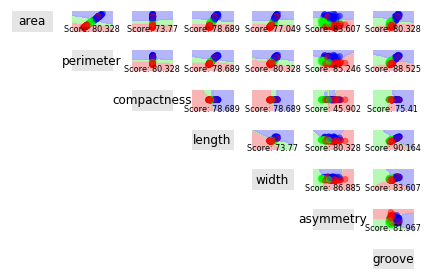

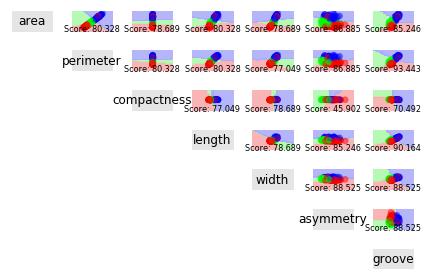

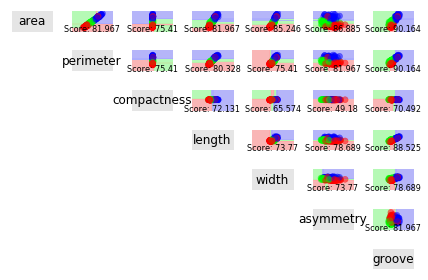

In [31]:
plt.show()

### Bonus:

After submitting your answers, mess around with the gamma, kernel, and C values.